In [44]:
import pandas as pd
import numpy as np
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

練習問題(1)

ベルヌーイ分布に従う乱数は、[`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html)。`rvs` メソッドを使うと分布に従う乱数を取得できる。

カテゴリカル分布は [`numpy.random.choice`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) を使えば良い。

In [45]:
from scipy.stats import bernoulli
bernoulli.rvs(0.2, size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
np.random.multinomial(100, [0.1, 0.2, 0.3, 0.4])

array([12, 16, 29, 43])

In [47]:
# 第一引数は array か int を渡す。4 なら 0~3 が選ばれる。p の長さと整合してる必要がある。
np.random.choice(4, 100, p=[0.1, 0.2, 0.3, 0.4])

array([3, 0, 3, 3, 3, 3, 1, 1, 2, 3, 2, 1, 2, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 2, 2, 2, 0, 1, 2, 3, 2, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 2, 0, 3, 3, 3, 3, 1, 3, 2, 0, 3, 2, 2, 3, 0, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 0, 3,
       3, 3, 3, 2, 1, 3, 2, 0])

練習問題(2)

ベータ分布
[`numpy.random.beta`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html#numpy.random.beta)

In [48]:
xs = np.random.beta(2, 3, 100) # a=2, b=3
print(xs)
print(np.average(xs)) # -> 0.4 程度になるはず

[ 0.05756342  0.30138976  0.27555273  0.06210224  0.5205418   0.36796219
  0.15692227  0.35695637  0.67818745  0.7913022   0.08588696  0.44235806
  0.41850612  0.13252047  0.46510928  0.24226032  0.09812069  0.30997114
  0.31922274  0.61524868  0.13519566  0.20392169  0.16306601  0.70396885
  0.69320503  0.89077691  0.50284846  0.39099553  0.39183082  0.5023561
  0.53628663  0.41702585  0.4021649   0.07621255  0.22026199  0.44945953
  0.15499284  0.4007472   0.3590723   0.72109383  0.17354559  0.07056354
  0.47478356  0.41352913  0.26142926  0.80005411  0.27989622  0.3172564
  0.14315856  0.71580876  0.42952634  0.59461311  0.56109733  0.73858868
  0.37845883  0.37699073  0.17389341  0.78139143  0.29494695  0.14738783
  0.66499919  0.36651271  0.1369858   0.47614651  0.429859    0.21341562
  0.29483189  0.50806395  0.69966339  0.11247742  0.33849578  0.1325814
  0.70356282  0.21506221  0.13528695  0.4476149   0.09826739  0.24241303
  0.66649136  0.52838569  0.31066157  0.34051509  0.37

ディリクレ分布

In [49]:
xs = np.random.dirichlet((10, 5, 3), 1000)
print(xs[:10])

[[ 0.52471021  0.23879591  0.23649388]
 [ 0.662084    0.22733431  0.11058169]
 [ 0.44161667  0.3650019   0.19338144]
 [ 0.67726107  0.15362885  0.16911008]
 [ 0.60208349  0.30758291  0.0903336 ]
 [ 0.65834967  0.2071623   0.13448803]
 [ 0.51664004  0.29551558  0.18784438]
 [ 0.50220656  0.42928768  0.06850576]
 [ 0.62901259  0.14764969  0.22333772]
 [ 0.49399383  0.39810145  0.10790473]]


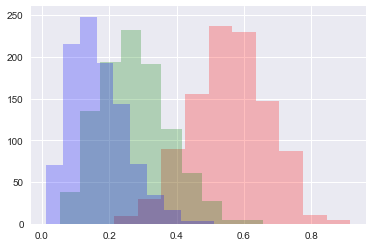

In [50]:
plt.hist([x[0] for x in xs], color="r", alpha=0.25)
plt.hist([x[1] for x in xs], color="g", alpha=0.25)
plt.hist([x[2] for x in xs], color="b", alpha=0.25)
plt.show()

ガンマ分布

教科書の定義は、
$$\text{Gamma}(y|\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}y^{\alpha-1}\exp(-\beta y)$$

`numpy.random.gamma` の定義は
$$p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k \Gamma(k)}$$

$k=\alpha$, $\theta=1/\beta$ という対応関係。

In [51]:
xs = np.random.gamma(5, 1/3, 10000) # alpha=5, beta=3
print(xs[:10])

[ 2.76140889  2.30026884  1.48377341  1.85866161  1.00496489  1.32159251
  1.53166386  1.1155353   1.0622227   1.46572272]


(array([   9.,   10.,   23.,   33.,   38.,   69.,  102.,  108.,  149.,
         170.,  201.,  225.,  270.,  284.,  300.,  283.,  306.,  332.,
         380.,  326.,  332.,  322.,  332.,  332.,  328.,  327.,  284.,
         283.,  290.,  230.,  242.,  221.,  211.,  222.,  197.,  193.,
         175.,  187.,  151.,  121.,  134.,  138.,  110.,  106.,   96.,
          64.,   77.,   67.,   59.,   51.,   64.,   49.,   39.,   34.,
          34.,   31.,   22.,   23.,   16.,   26.,   19.,   20.,   15.,
          10.,   14.,   13.,   13.,    7.,    5.,    6.,    4.,    4.,
           3.,    6.,    4.,    2.,    4.,    0.,    1.,    1.,    2.,
           0.,    1.,    2.,    1.,    1.,    1.,    0.,    0.,    1.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.14972202,  0.20786421,  0.26600641,  0.3241486 ,  0.3822908 ,
         0.44043299,  0.49857518,  0.55671738,  0.61485957,  0.67300177,
         0.73114396,  0.78928615,  0.84742835,  0.90557054,  0.9

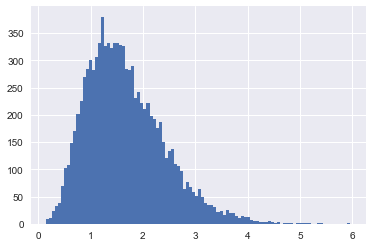

In [52]:
plt.hist(xs, bins=100)

多変量正規分布

`scipy.stats.multivariate_normal` を使う

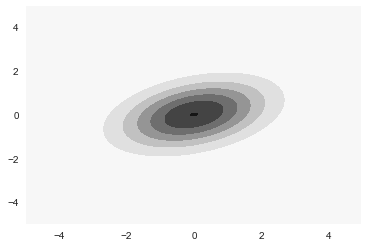

In [53]:
from scipy.stats import multivariate_normal
xs, ys = np.mgrid[-5:5:.05, -5:5:.05]
pos = np.dstack((xs, ys))
rv = multivariate_normal([0.0, 0.0], [[2.0, 0.5], [0.5, 1.0]])
plt.contourf(xs, ys, rv.pdf(pos))

コーシー分布

`np.random.standard_cauchy`

-150.109632456 88.0090929723


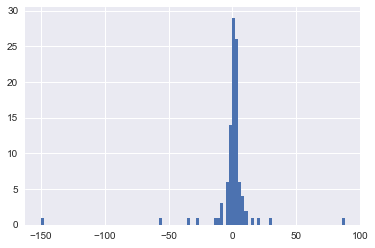

In [56]:
ys = np.random.standard_cauchy(100)
xs = 1.0+2.0*ys # 平均 1.0, 幅 2.0
print(min(xs), max(xs)) # 予想以上に絶対値の大きな値が出てくる
plt.hist(xs, bins=100)
plt.show()

練習問題(3)

$$\begin{array}{rcl}
y_1 & \sim & \mathcal{N}(50, 20) \\
y_2 & \sim & \mathcal{N}(20, 15) \\
y_1 + y_2 & \sim & \mathcal{N}(50-20, \sqrt{20^2+15^2})
\end{array}$$

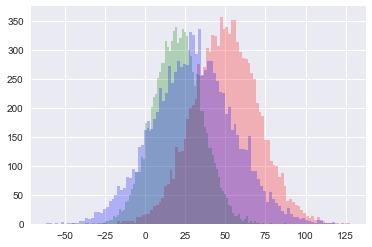

In [55]:
y1 = np.random.normal(50, 20, 10000)
y2 = np.random.normal(20, 15, 10000)
y3 = y1-y2
plt.hist(y1, bins=100, alpha=0.25, color="r")
plt.hist(y2, bins=100, alpha=0.25, color="g")
plt.hist(y3, bins=100, alpha=0.25, color="b")
plt.show()